In [167]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as py
import pandas as pd

#Making a list of missing value types

In [168]:
missing_values = ["?","n/a","na", "--"]
data=pd.read_csv('adult.csv',skipinitialspace=True,na_values = missing_values)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,moving-relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Checking the data type and the column info

In [169]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                    32561 non-null int64
workclass              30725 non-null object
fnlwgt                 32561 non-null int64
education              32561 non-null object
education-num          32561 non-null int64
marital-status         32561 non-null object
occupation             30718 non-null object
moving-relationship    32561 non-null object
race                   32561 non-null object
sex                    32561 non-null object
capital-gain           32561 non-null int64
capital-loss           32561 non-null int64
hours-per-week         32561 non-null int64
native-country         31978 non-null object
Income                 32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


Checking if there is any null value present in any column

In [170]:
print (data.isnull().values.any())

True


Replacing the Mode value if there is any null present

In [171]:
data['workclass'].fillna(data['workclass'].mode()[0],inplace=True)
sum(data['workclass'].isnull())

0

#Checking the count of null in Native country column

In [172]:
sum(data['native-country'].isnull())

583

In [173]:
#Replacing the Mode value if there is any null present
data['native-country'].fillna(data['native-country'].mode()[0],inplace=True)
sum(data['native-country'].isnull())

0

In [174]:
sum(data['occupation'].isnull())

1843

In [175]:
#Replacing the Mode value if there is any null present
data['occupation'].fillna(data['occupation'].mode()[0],inplace=True)
sum(data['occupation'].isnull())

0

In [176]:
#data.hist(column='age',figsize(8,10))
#data['age'].plot(kind='hist',bins=20,figsize=(10,6))
#py.show()


In [177]:
#Grouping the Gender with respect to Income. Checking the ratio of female and male who are less or more than the income 50 K 
var=data.groupby(['sex']).Income.value_counts(normalize=True)
var

sex     Income
Female  <=50K     0.890539
        >50K      0.109461
Male    <=50K     0.694263
        >50K      0.305737
Name: Income, dtype: float64

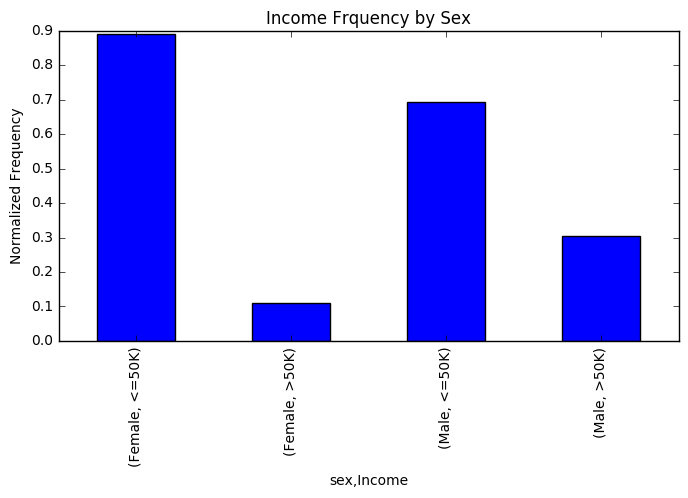

In [178]:
#Above group by is visualized
py.figure(figsize=(8,4))
py.subplot(1,1,1);var.plot(kind='bar');
py.title('Income Frquency by Sex')
py.ylabel('Normalized Frequency')
py.show()

In [179]:
data['ageGroup']=pd.cut(data.age,[0,20,33,72,90],labels=['0-20','20-33','33-72','72-90'])
var=data.groupby(['ageGroup']).Income.value_counts(normalize=True)
var


ageGroup  Income
0-20      <=50K     0.999170
          >50K      0.000830
20-33     <=50K     0.884404
          >50K      0.115596
33-72     <=50K     0.656419
          >50K      0.343581
72-90     <=50K     0.827930
          >50K      0.172070
Name: Income, dtype: float64

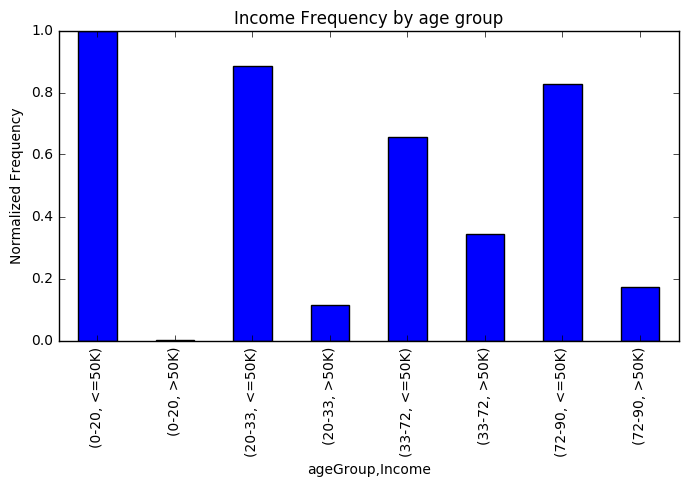

In [180]:
py.figure(figsize=(8,4))
py.subplot(1,1,1);var.plot(kind='bar');
py.title('Income Frequency by age group')
py.ylabel('Normalized Frequency')
py.show()

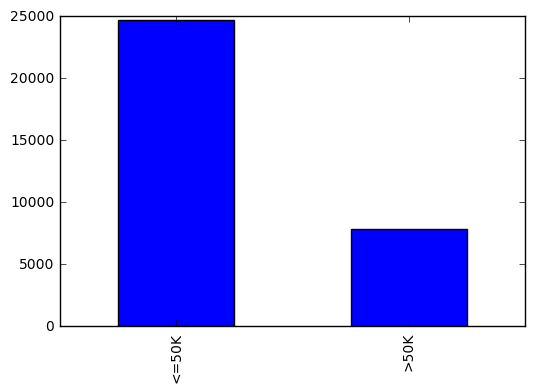

In [181]:
py.figure(figsize=(6,4))
data.Income.value_counts().plot(kind='bar')
py.show()

Creating the string labels into Numbers

In [182]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

#data.head()

df=pd.DataFrame()

df=data[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].copy()

df['workclass_en']=le.fit_transform(data.workclass.astype(str))
df['education_en']=le.fit_transform(data['education'].astype(str))
df['marital_en']=le.fit_transform(data['marital-status'].astype(str))
df['occupation_en']=le.fit_transform(data['occupation'].astype(str))
df['relationship_en']=le.fit_transform(data['moving-relationship'].astype(str))
df['race_en']=le.fit_transform(data['race'].astype(str))
df['country_en']=le.fit_transform(data['native-country'].astype(str))
df['Income_en']=le.fit_transform(data['Income'].astype(str))
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_en,education_en,marital_en,occupation_en,relationship_en,race_en,country_en,Income_en
0,39,77516,13,2174,0,40,6,9,4,0,1,4,38,0
1,50,83311,13,0,0,13,5,9,2,3,0,4,38,0
2,38,215646,9,0,0,40,3,11,0,5,1,4,38,0
3,53,234721,7,0,0,40,3,1,2,5,0,2,38,0
4,28,338409,13,0,0,40,3,9,2,9,5,2,4,0


In [183]:
#Placing Income column in Y and all other columns in X
X = df.iloc[:, :-1].values #exclude last column
y=df.iloc[:,1].values #get array of dataset in column 1st

Split the data into Train and test

In [184]:
print(X.shape)
print(y.shape)

(32561, 13)
(32561,)


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(26048, 13) (26048,)
(6513, 13) (6513,)


Model generation

In [186]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

Accuracy Calculation

In [187]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.31690465223399356
